## Beautiful and insightful charts with Python — the Quick, the Pretty, and the Awesome.

In today’s article, we are going to look into three different ways of plotting data with Python. We will do this by utilizing data from the World Happiness Report 2019. I enriched the World Happiness Report data with information from Gapminder and Wikipedia to allow for the exploration of new relationships and visualizations.


### The Pretty: Advanced plotting with Seaborn


In [3]:
import plotly
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
data = pd.read_csv('https://raw.githubusercontent.com/FBosler/AdvancedPlotting/master/combined_set.csv')

In [23]:
data['Mean Log GDP per capita']  = data.groupby('Year')['Log GDP per capita'].transform(
    pd.qcut,
    q=5,
    labels=(['Lowest','Low','Medium','High','Highest'])
)

In [24]:
data.head()

,Year,Country name,ISO3,Continent,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Gapminder Life Expectancy,Gapminder Population,Mean Log GDP per capita
0,2007,Afghanistan,AFG,Asia,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,55.2,27300000.0,Lowest
1,2008,Afghanistan,AFG,Asia,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,55.2,27300000.0,Lowest
2,2009,Afghanistan,AFG,Asia,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,55.7,28000000.0,Lowest
3,2010,Afghanistan,AFG,Asia,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,56.2,28800000.0,Lowest
4,2011,Afghanistan,AFG,Asia,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,56.7,29700000.0,Lowest


In [60]:
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(7,5)}, 
    style="white" # nicer layout
)

### Plotting univariate distributions

As mentioned before, I am a big fan of distributions. Histograms and kernel density distributions alike are potent ways of visualizing the critical features of a particular variable. Let’s look at how we generate distributions for a single variable or distributions of multiple variables in one chart.

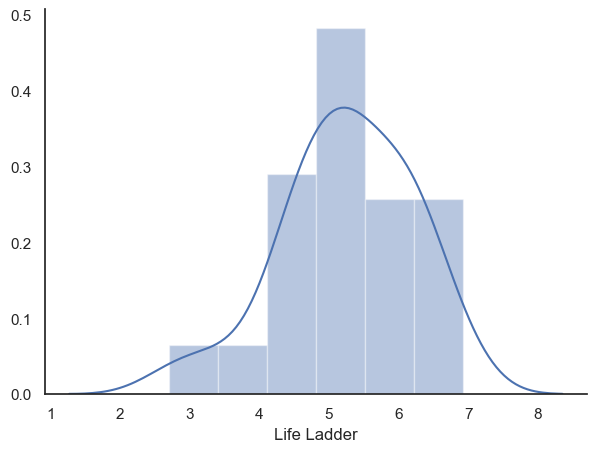

In [17]:
sns_data = data[
    (data.Year == 2018) &
    (data.Continent == 'Asia')
]

sns.distplot(
    sns_data['Life Ladder'],
    label = 'Life Laffer'
)

sns.despine()
plt.show()

In [18]:
data.columns

Index(['Year', 'Country name', 'ISO3', 'Continent', 'Life Ladder',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality', 'Gapminder Life Expectancy',
       'Gapminder Population'],
      dtype='object')

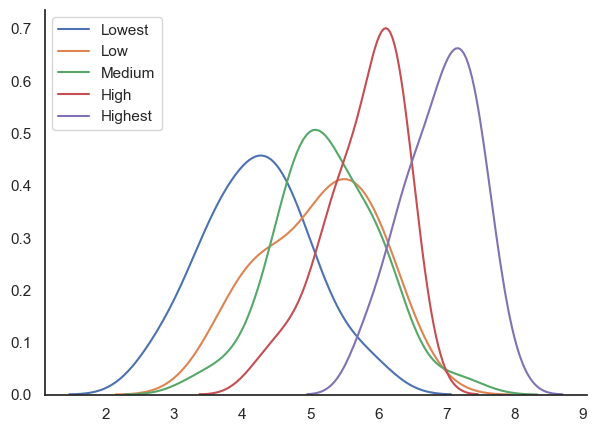

In [25]:
__sns_data = {}

for val in data['Mean Log GDP per capita'].cat.categories:
    __sns_data[val] = data[
        (data['Year'] == 2018) &
        (data['Mean Log GDP per capita'] == val)
    ]
    
    sns.kdeplot(
        __sns_data[val]['Life Ladder'],
        label = val
    )
    
sns.despine()
plt.show()

### Plotting bivariate distributions

Whenever I want to explore the relationship between two or multiple variables visually, it typically comes down to some form of scatterplot and an assessment of distributions. There are three variations of a conceptually similar plot. In each of those plots, the center graph (scatter, bivariate KDE, and hexbin) helps to understand the joint frequency distribution between two variables. Additionally, at the right and top border of the center graph, the marginal univariate distribution of the respective variable is depicted (as a KDE or histogram).

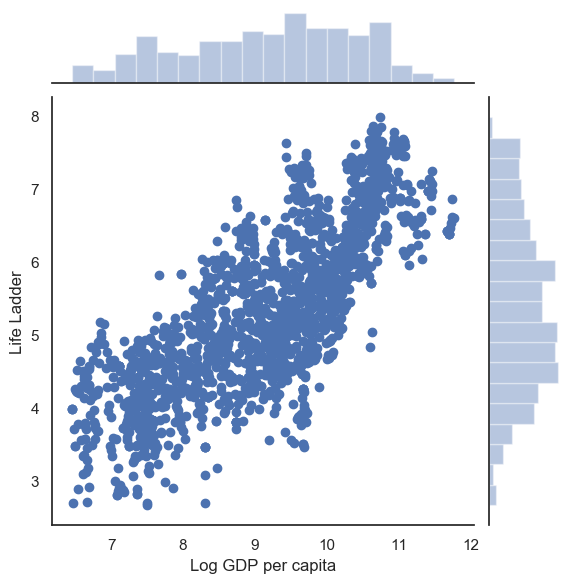

In [39]:
sns.jointplot(
    x='Log GDP per capita',
    y='Life Ladder',
    data=data,
    kind='scatter' # or 'kde' or 'hex'
)

plt.show()

### Scatterplot

A scatterplot is a way of visualizing the joint density distribution of two variables. We can throw a third variable in the mix by adding a hue and a fourth variable by adding the size parameter.

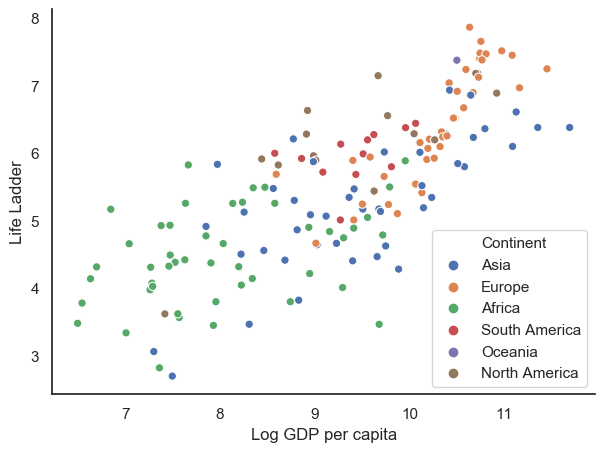

In [61]:
sns.scatterplot(
    x='Log GDP per capita',
    y='Life Ladder',
    data=data[data['Year'] == 2018],    
    hue='Continent',
    #size='Gapminder Population'
)
# both, hue and size are optional
sns.despine() # prettier layout
plt.show()

### Violin plot

The violin plot is a combination of a box plot and a kernel density estimate. It plays a similar role as a box plot. It shows the distribution of quantitative data across categorical variables such that those distributions can be compared.

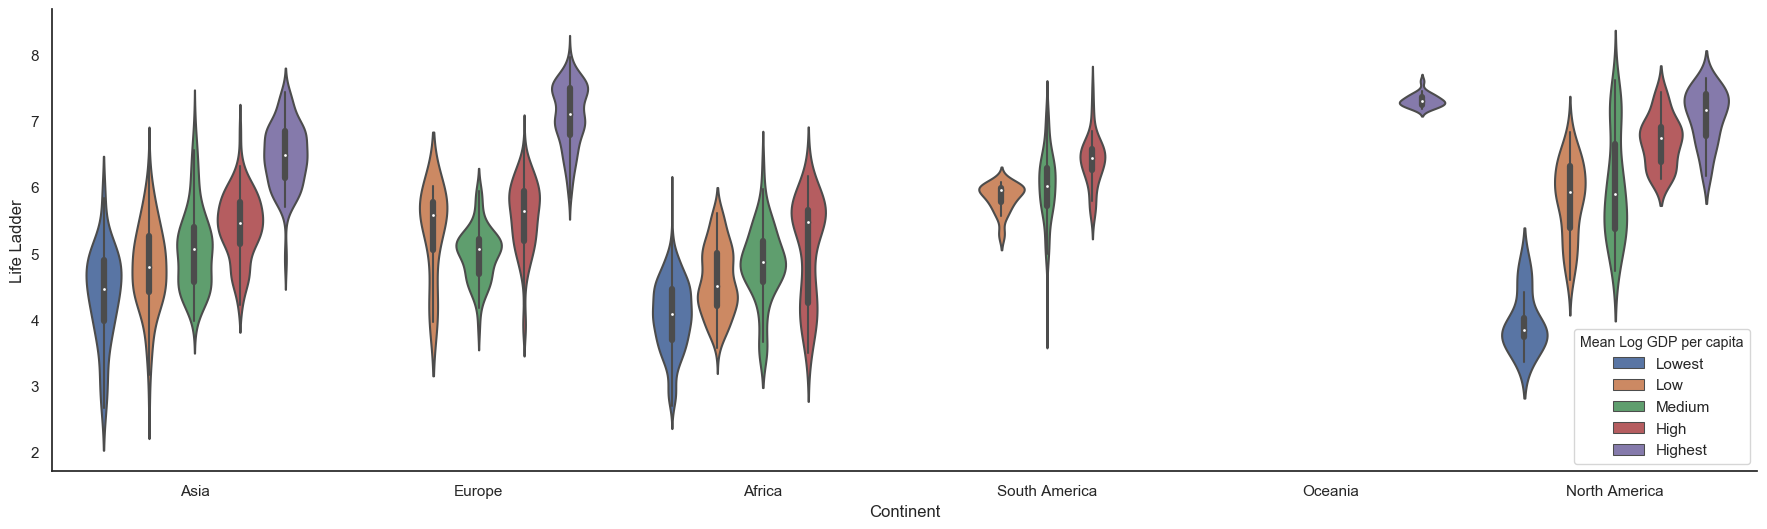

In [62]:
sns.set(
    rc={'figure.figsize':(22,6)}, 
    style="white"
)
sns.violinplot(
    x='Continent',
    y='Life Ladder',
    hue='Mean Log GDP per capita',
    data=data
)
sns.despine()
plt.show()

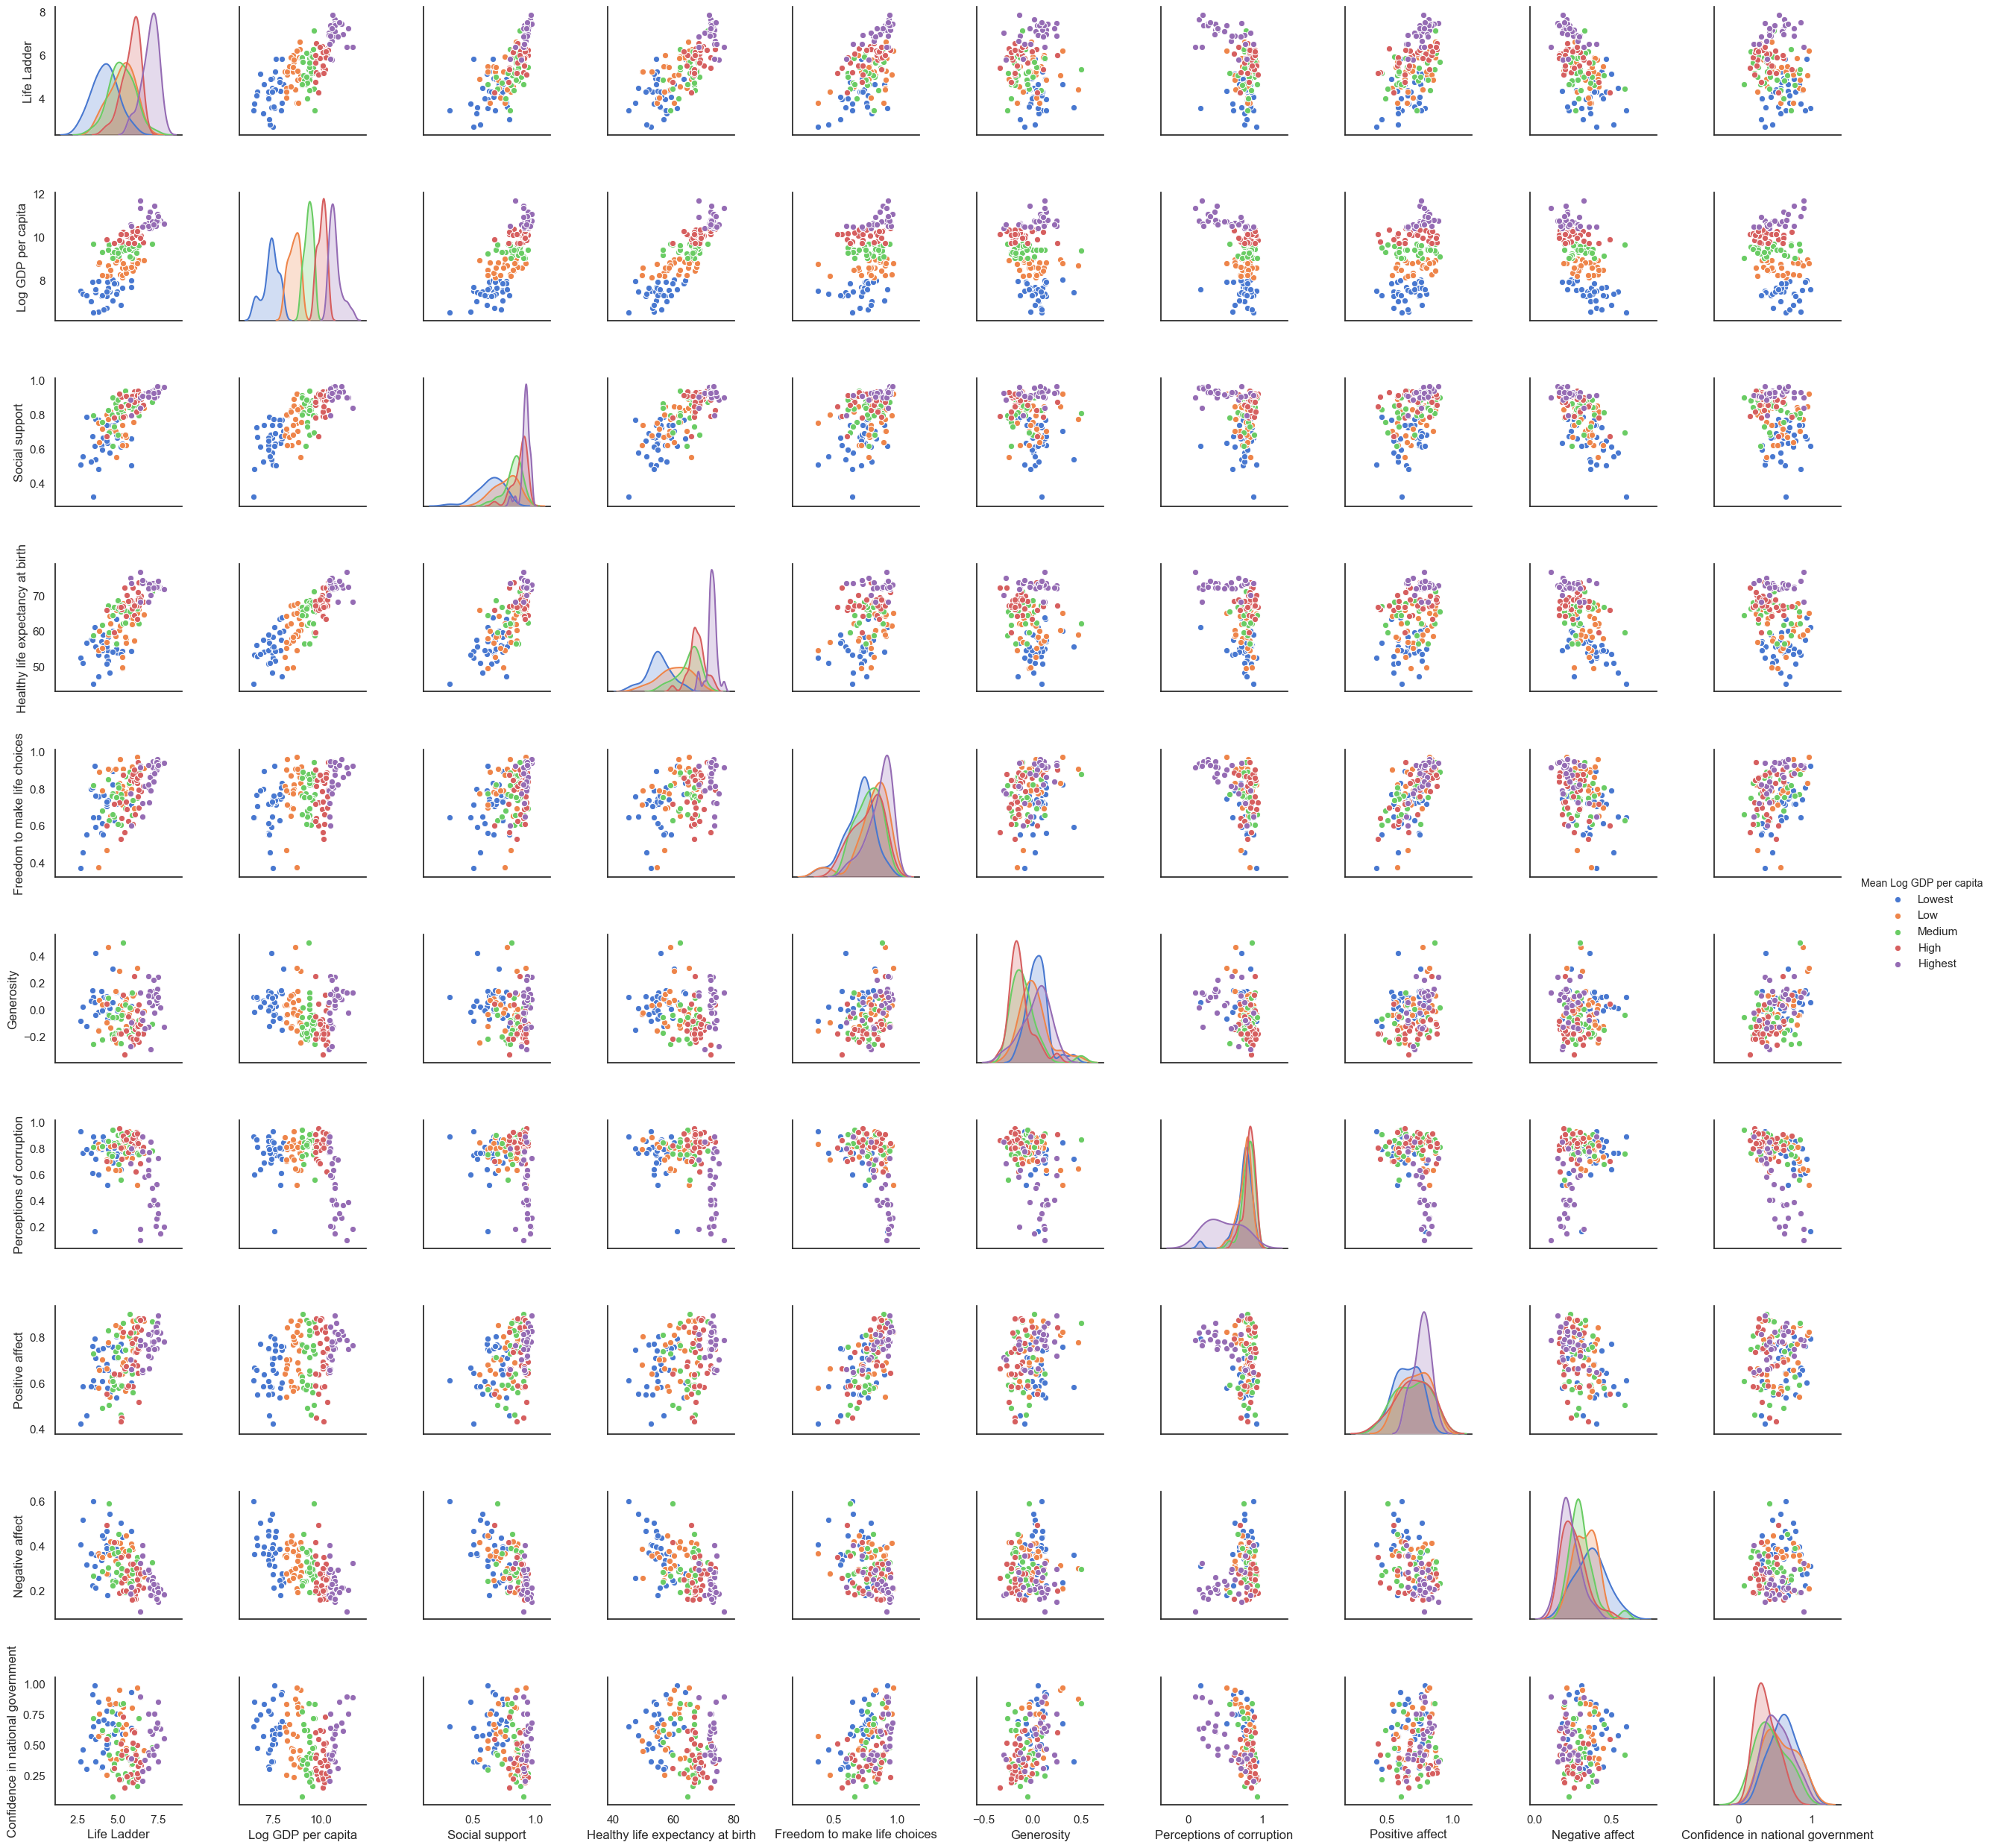

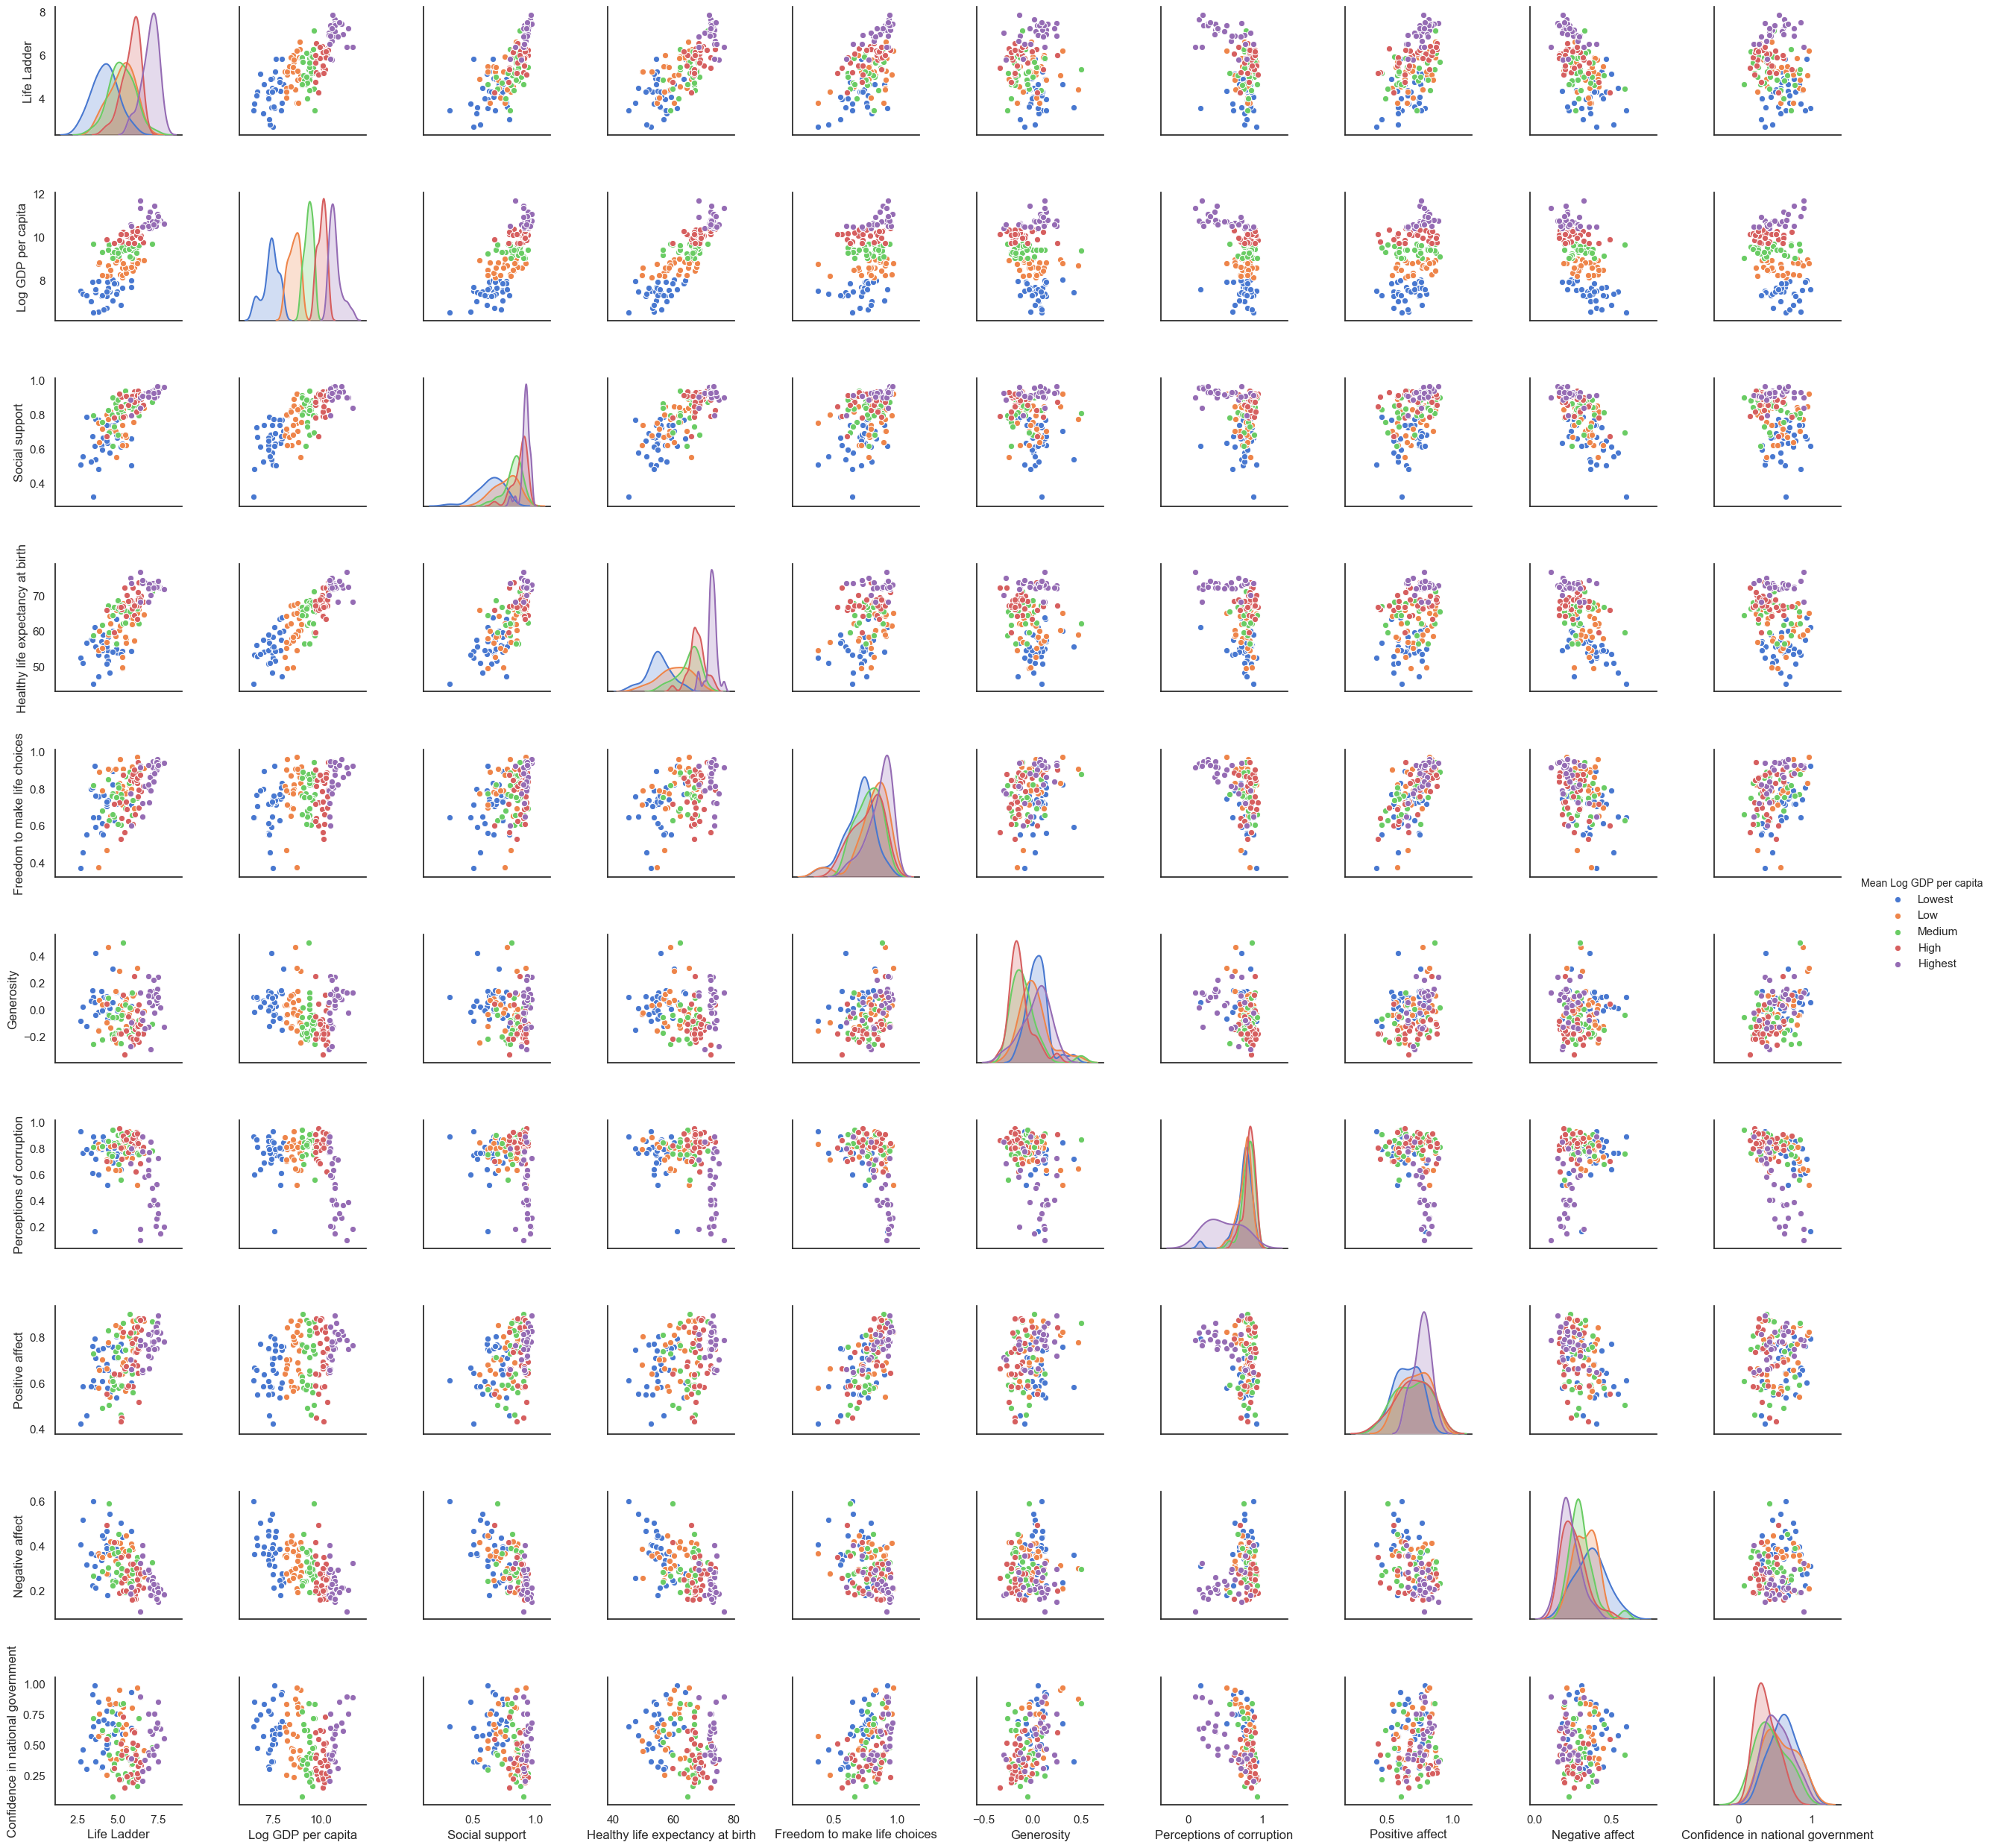

In [64]:
sns.set(
    style="white", 
    palette="muted", 
    color_codes=True
)
sns.pairplot(
    data[data.Year == 2018][[
        'Life Ladder','Log GDP per capita', 
        'Social support','Healthy life expectancy at birth', 
        'Freedom to make life choices','Generosity', 
        'Perceptions of corruption', 'Positive affect',
        'Negative affect','Confidence in national government',
        'Mean Log GDP per capita'
    ]].dropna(), 
    hue='Mean Log GDP per capita'
)

plt.show()

### Facet Grids

Seaborn’s FacetGrid, to me, is one of the most convincing arguments to use Seaborn as it makes creating multi-plots a breeze. With the pair plot, we already have seen an example of a FacetGrid. The FacetGrid allows creating multiple charts segmented by variables. For example, the rows could be one variable (category of GDP per capita) and the columns another one (continents).
It does require a bit more customization (i.e., using matplotlib) then I’d personally like, but it is nonetheless compelling.

### FacetGrid — Line plot

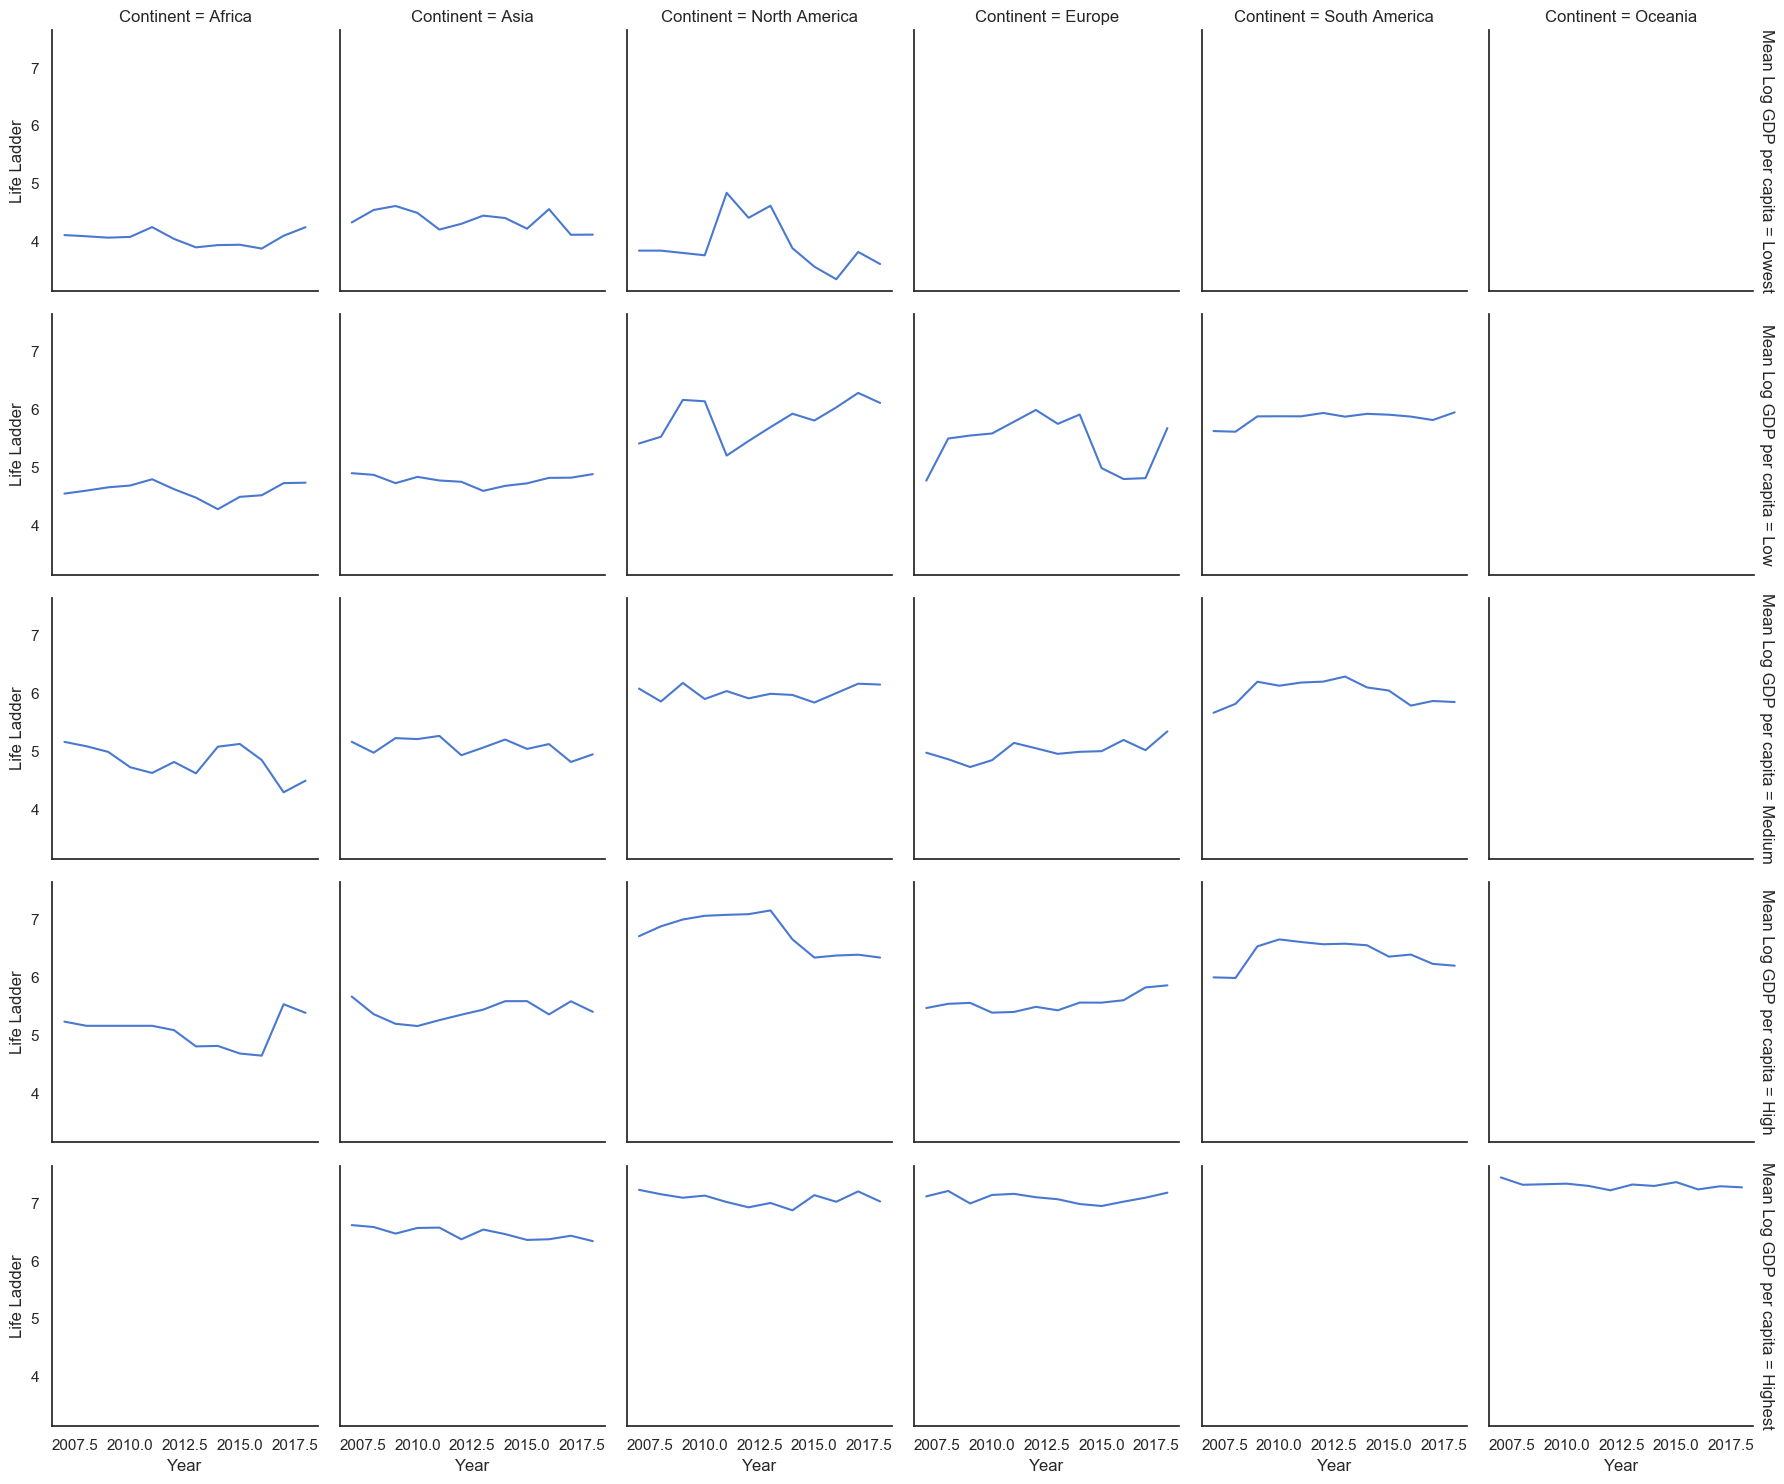

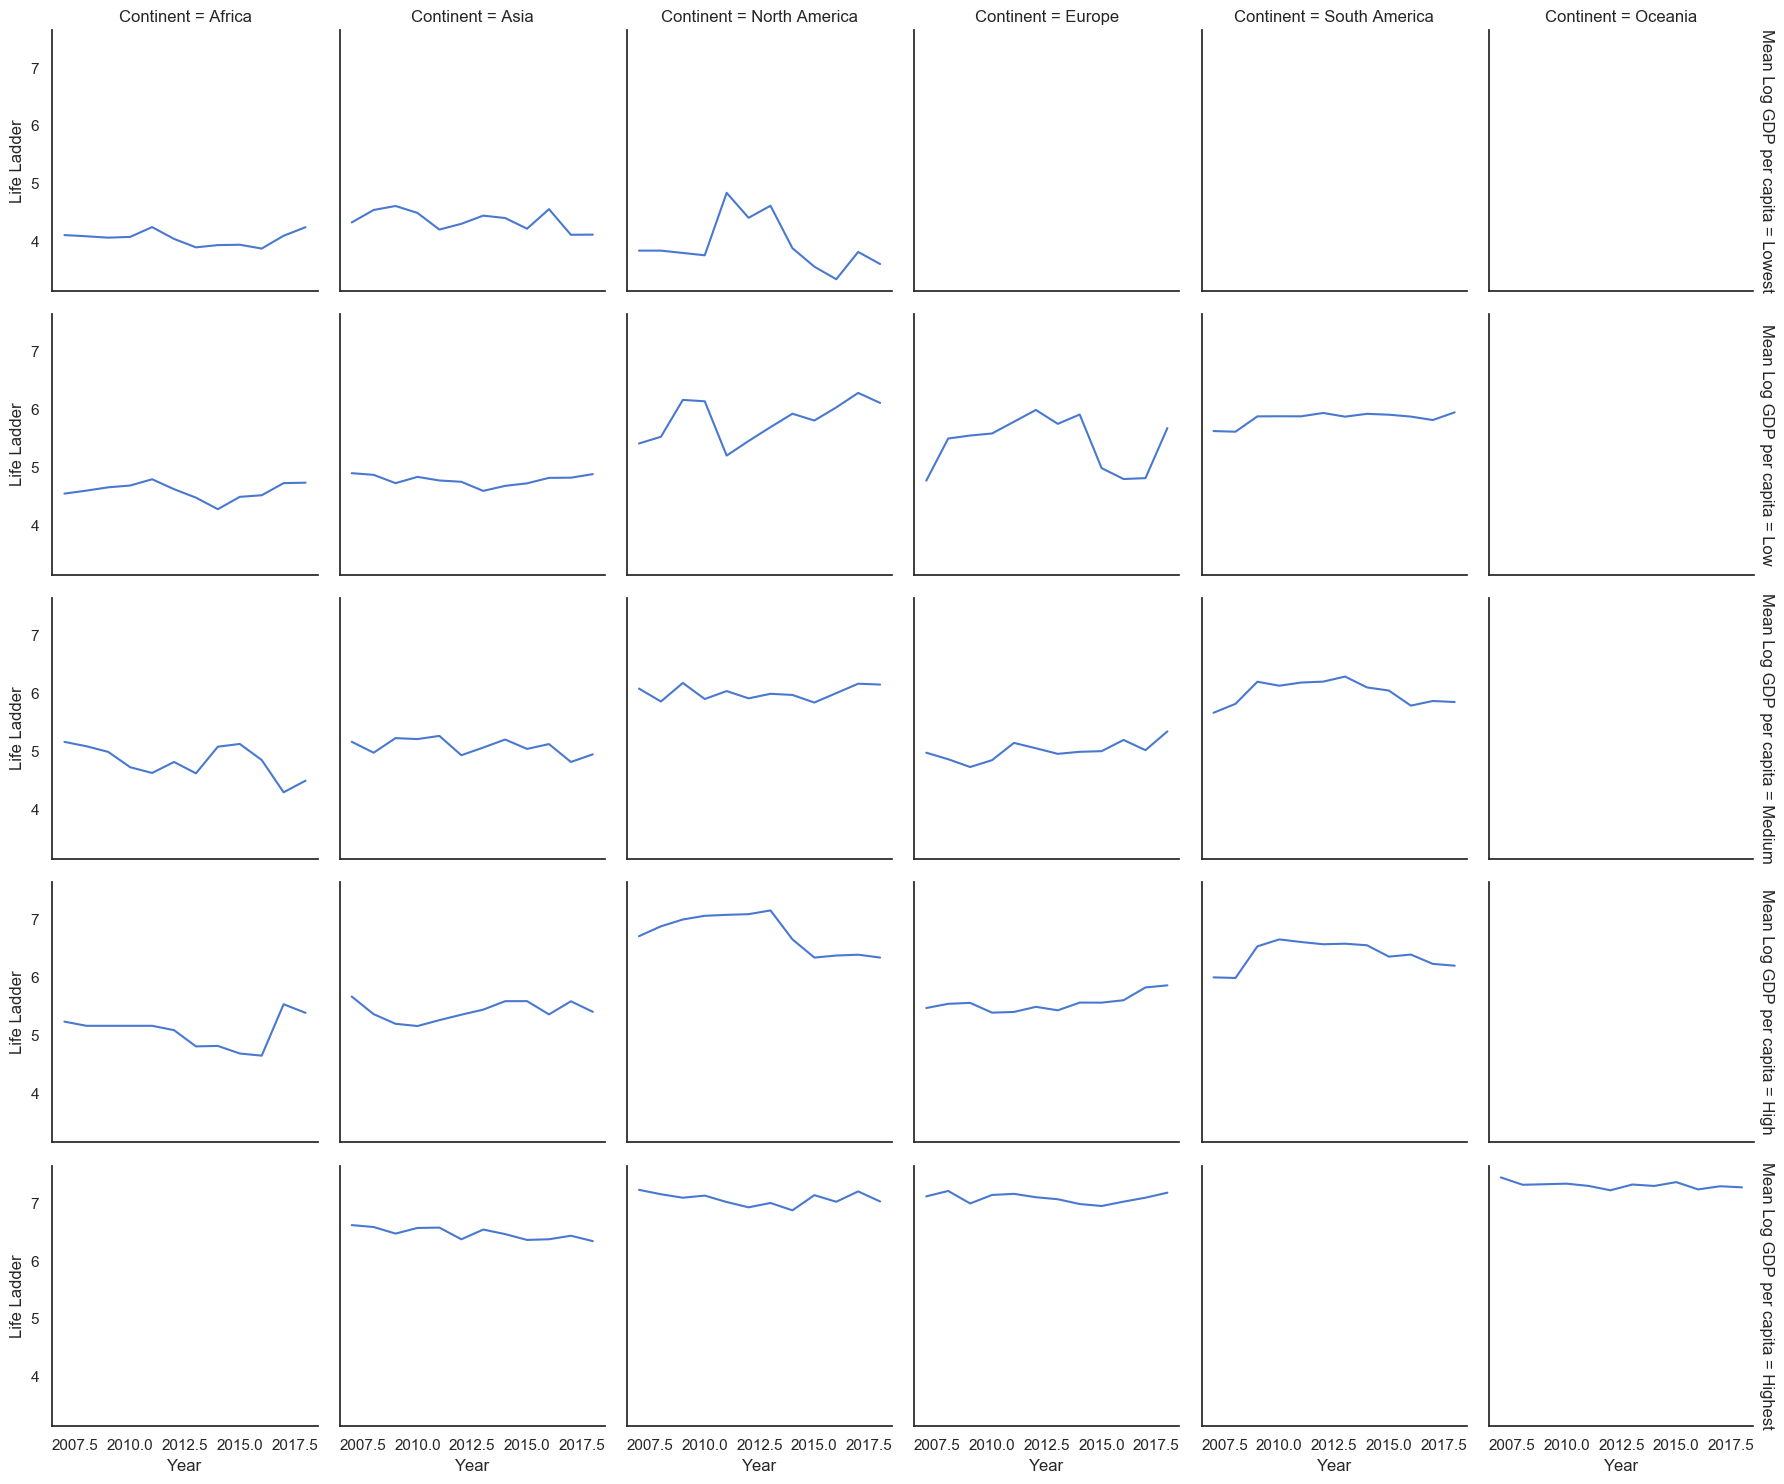

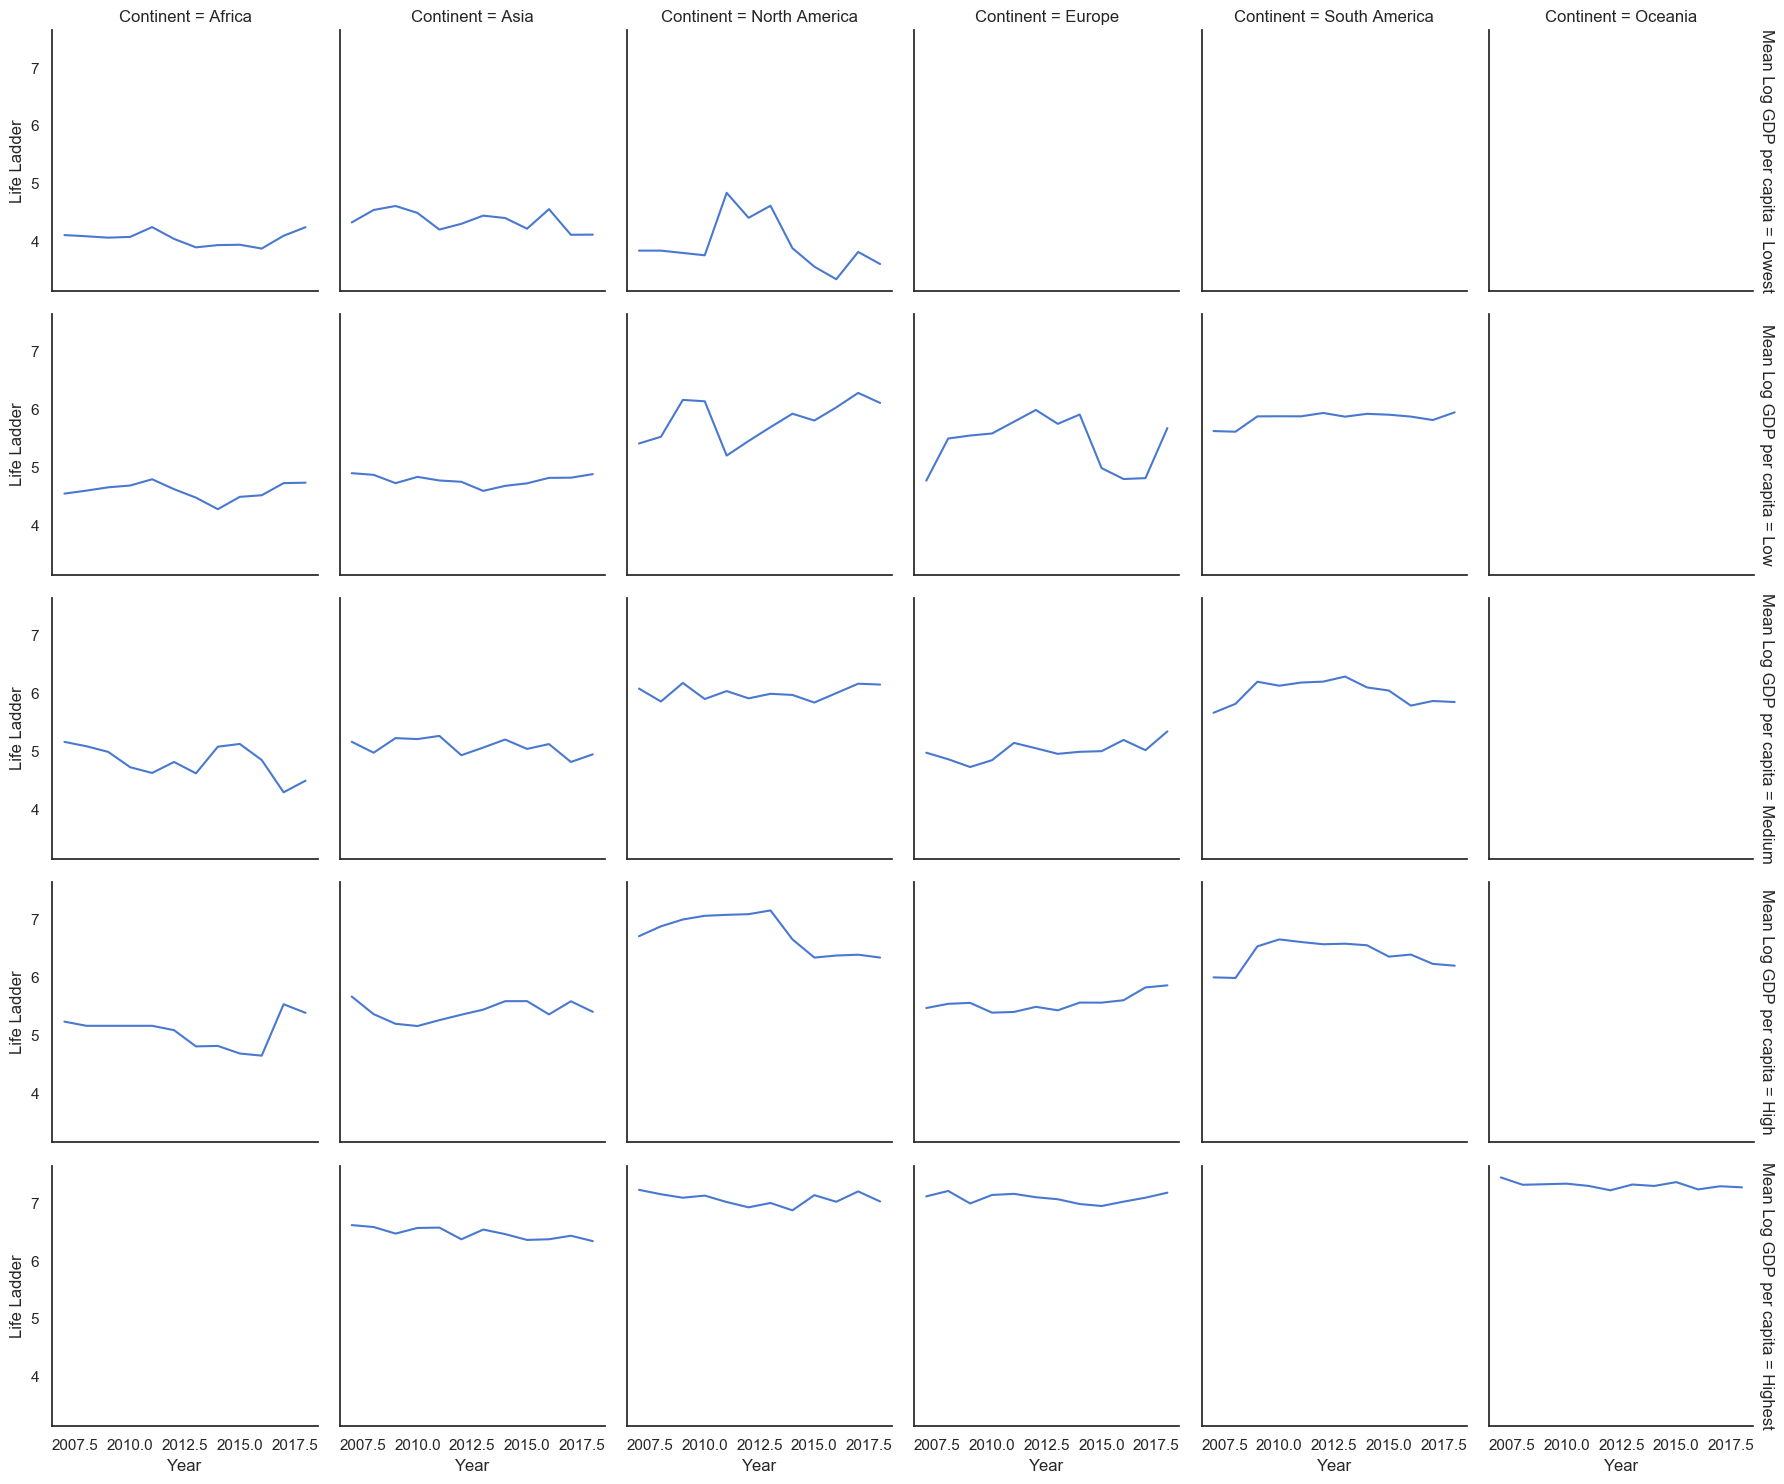

In [68]:
g = sns.FacetGrid(
    data.groupby(['Mean Log GDP per capita','Year','Continent'])['Life Ladder'].mean().reset_index(),
    row='Mean Log GDP per capita',
    col='Continent',
    margin_titles=True
)
g = (g.map(plt.plot, 'Year','Life Ladder')
    )

plt.show()

### FacetGrid — histograms

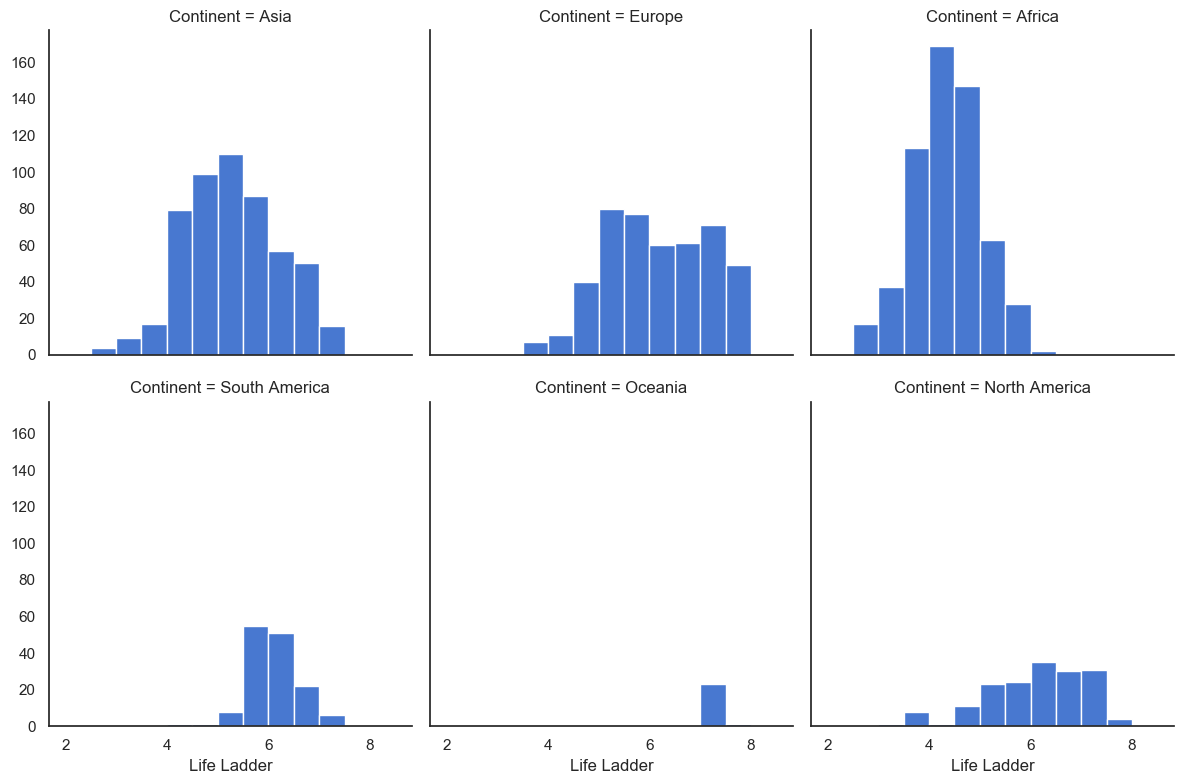

In [71]:
g = sns.FacetGrid(data, col="Continent", col_wrap=3,height=4)
g = (g.map(plt.hist, "Life Ladder",bins=np.arange(2,9,0.5)))

plt.show()

### FacetGrid — annotated KDE plots

It is also possible to add facet specific notation to each chart in a grid. In the following example, we add the mean and the standard deviation and a vertical line drawn at the mean (code below).

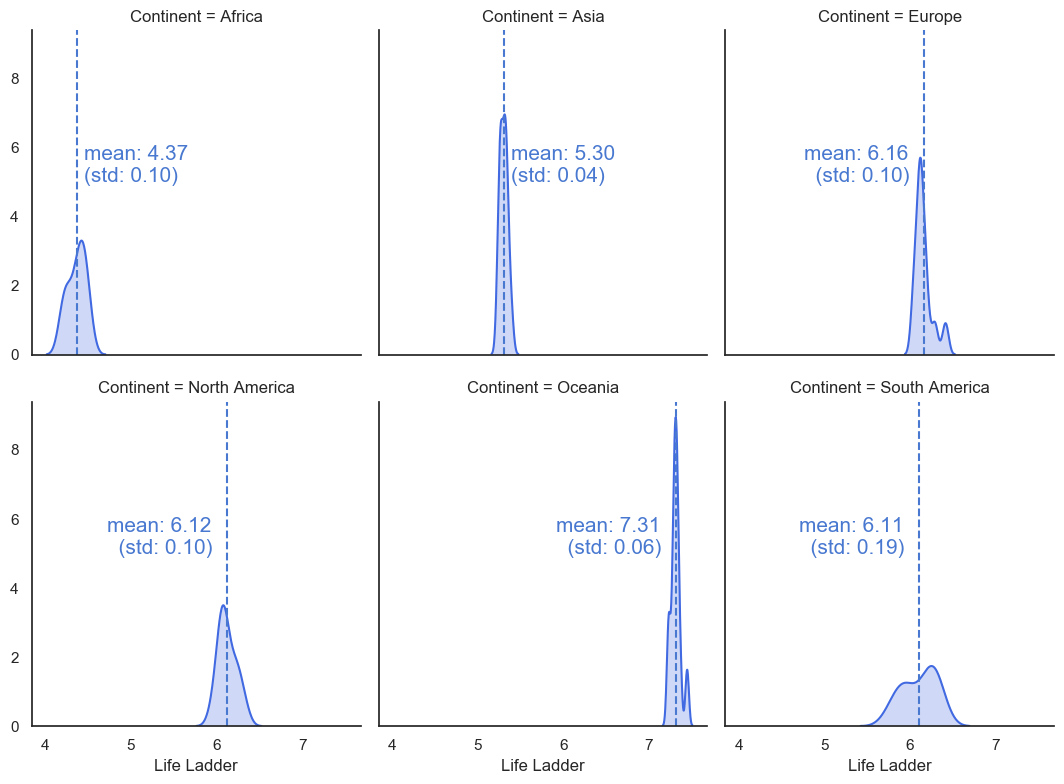

In [72]:
def vertical_mean_line(x, **kwargs):
    plt.axvline(x.mean(), linestyle ="--", 
                color = kwargs.get("color", "r"))
    txkw = dict(size=15, color = kwargs.get("color", "r"))

    label_x_pos_adjustment = 0.08 # this needs customization based on your data
    label_y_pos_adjustment = 5 # this needs customization based on your data
    if x.mean() < 6: # this needs customization based on your data
        tx = "mean: {:.2f}\n(std: {:.2f})".format(x.mean(),x.std())
        plt.text(x.mean() + label_x_pos_adjustment, label_y_pos_adjustment, tx, **txkw)
    else:
        tx = "mean: {:.2f}\n  (std: {:.2f})".format(x.mean(),x.std())
        plt.text(x.mean() -1.4, label_y_pos_adjustment, tx, **txkw)

_ = data.groupby(['Continent','Year'])['Life Ladder'].mean().reset_index()

g = sns.FacetGrid(_, col="Continent", height=4, aspect=0.9, col_wrap=3, margin_titles=True)
g.map(sns.kdeplot, "Life Ladder", shade=True, color='royalblue')
g.map(vertical_mean_line, "Life Ladder")

plt.show()

### FacetGrid — heatmap plots

One of my favorite plot types is a heatmap FacetGrid, i.e., a heatmap in every facet of the grid. This type of plot is useful to visualize four dimensions and a metric in one single plot. The code is a bit cumbersome but can be adjusted quickly to your needs. It is noteworthy that this kind of chart requires a relatively large amount of data or proper segmentation as it does not handle missing values very well.

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



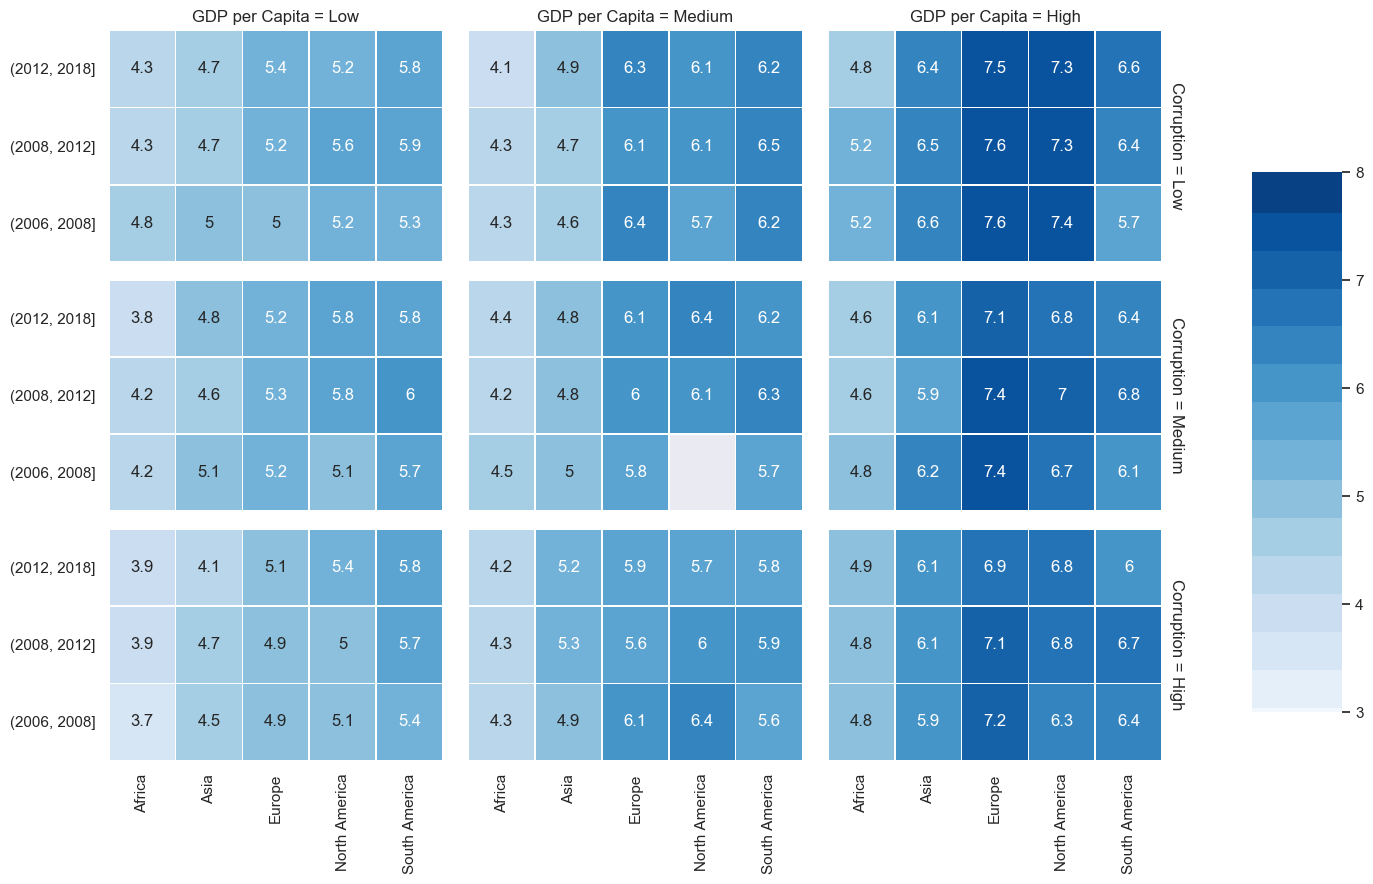

In [73]:
def draw_heatmap(data,inner_row, inner_col, outer_row, outer_col, values, vmin,vmax):
    sns.set(font_scale=1)
    fg = sns.FacetGrid(
        data, 
        row=outer_row,
        col=outer_col, 
        margin_titles=True
    )

    position = left, bottom, width, height = 1.4, .2, .1, .6
    cbar_ax = fg.fig.add_axes(position) 

    fg.map_dataframe(
        draw_heatmap_facet, 
        x_col=inner_col,
        y_col=inner_row, 
        values=values, 
        cbar_ax=cbar_ax,
        vmin=vmin, 
        vmax=vmax
    )

    fg.fig.subplots_adjust(right=1.3)  
    plt.show()

def draw_heatmap_facet(*args, **kwargs):
    data = kwargs.pop('data')
    x_col = kwargs.pop('x_col')
    y_col = kwargs.pop('y_col')
    values = kwargs.pop('values')
    d = data.pivot(index=y_col, columns=x_col, values=values)
    annot = round(d,4).values
    cmap = sns.color_palette("Blues",30) + sns.color_palette("Blues",30)[0::2]
    #cmap = sns.color_palette("Blues",30)
    sns.heatmap(
        d, 
        **kwargs,
        annot=annot, 
        center=0, 
        cmap=cmap, 
        linewidth=.5
    )

# Data preparation
_ = data.copy()
_['Year'] = pd.cut(_['Year'],bins=[2006,2008,2012,2018])

_['GDP per Capita'] = _.groupby(['Continent','Year'])['Log GDP per capita'].transform(
    pd.qcut,
    q=3,
    labels=(['Low','Medium','High'])
).fillna('Low')

_['Corruption'] = _.groupby(['Continent','GDP per Capita'])['Perceptions of corruption'].transform(
    pd.qcut,
    q=3,
    labels=(['Low','Medium','High'])
)

_ = _[_['Continent'] != 'Oceania'].groupby(['Year','Continent','GDP per Capita','Corruption'])['Life Ladder'].mean().reset_index()
_['Life Ladder'] = _['Life Ladder'].fillna(-10)

draw_heatmap(
    data=_,
    outer_row='Corruption',
    outer_col='GDP per Capita',
    inner_row='Year',
    inner_col='Continent',
    values='Life Ladder',
    vmin=3,
    vmax=8,
)

plt.show()

Facet heatmap, visualizing on the outer rows a year range, outer columns the GDP per Capita, on the inner rows the level of perceived corruption and the inner columns the continents. We see that happiness increases towards the top right (i.e., high GDP per Capita and low perceived corruption). The effect of time is not definite, and some continents (Europe and North America) seem to be happier than others (Africa).